This notebook is an experiment to come up with the best way to quantify FORM of a cricketer. 

- Player-specific dfs
- MatchID, Venue, Team, Opposition, [Score against each category of opposition], Outed_by/Removed_in, Playing-Style Score

In [19]:
import pandas as pd
import warnings
import numpy as np
import os
import json
import matplotlib.pyplot as plt
players_path='/content/drive/MyDrive/Cricket Related Data/PLAYERS'
json_path='/content/drive/MyDrive/odis_json'
L = sorted(os.listdir(players_path))

In [20]:
path='/content/drive/MyDrive/Cricket Related Data/PLAYERS/V Kohli.csv'
df = pd.read_csv(path).drop(axis=1,columns=['Unnamed: 0'])
df1 = df.groupby(['match_id', 'venue', 'opposition',]).sum()
df1['runs_scored'].to_numpy()
df.shape

<ipython-input-20-7116853cca94>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(['match_id', 'venue', 'opposition',]).sum()


(765, 11)


[(-0.22843702592730084, 12, 'Rajin Saleh'), (-0.1757537282463338, 5, 'SM Katich'), (-0.14738812063953355, 5, 'W Madhevere'), (-0.12943389324017224, 8, 'HH Gibb'), (-0.11779692116907026, 8, 'Sabbir Rahman'), (-0.11539536855719167, 12, 'S Dhawan'), (-0.11376618305024841, 15, 'G Gambhir'), (-0.10958799423662945, 4, 'GB Brent'), (-0.1004183397932394, 10, 'PJ Moor'), (-0.09489482250217789, 15, 'AK Markram'), (-0.08663162964855055, 15, 'Najibullah Zadran'), (-0.08484857633987525, 20, 'MD Shanaka'), (-0.08167602355833488, 20, 'SP Fleming'), (-0.07588663795627112, 3, 'WTS Porterfield'), (-0.07404880929695051, 7, 'HE van der Dussen'), (-0.07360557474842354, 12, 'SR Tendulkar'), (-0.07011454005148707, 3, 'T Taibu'), (-0.05401901404651007, 4, "NJ O'Brien"), (-0.052031639994200386, 12, 'KD Karthik'), (-0.04967143113037126, 4, 'Mohammad Hafeez'), (-0.03251989877943228, 7, 'N Deonarine'), (-0.031531612969559565, 4, 'H Masakadza'), (-0.02856593538578212, 15, 'E Lewi'), (-0.02423328869403237, 5, 'GC 

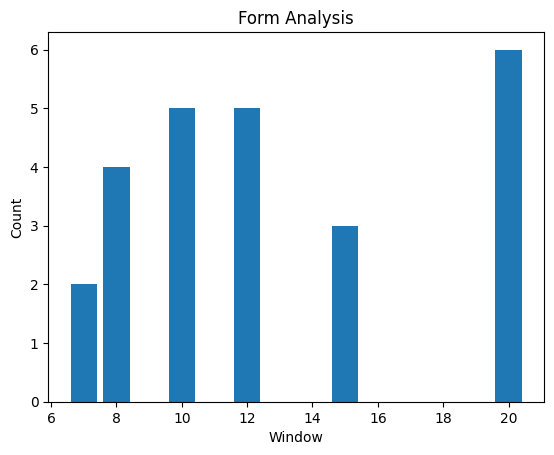

In [16]:
flist=[]
for filename in L:
  path = os.path.join(players_path,filename)
# path='/content/drive/MyDrive/Cricket Related Data/PLAYERS/A Maregwede.csv'
  df = pd.read_csv(path).drop(axis=1,columns=['Unnamed: 0'])
  if df.shape[0] < 30: #min no. of matches rquired
    continue
  M=df.pop('match_id')#.to_numpy()
  D=[]
  for m in M:
    D.append(json.load(open(os.path.join(json_path,str(m)+'.json'),'r'))["info"]["dates"][0])
  df_=pd.DataFrame({'match_id':M, 'date':D})
  df=pd.concat([df_,df],axis=1)
  df = df[['date','match_id', 'venue', 'opposition', 'runs_scored']]
  # df
  Lx=[]
  # x=10
  with warnings.catch_warnings():
    warnings.simplefilter("error")
    try:
      for x in [3,4,5,7,8,10,12,15,20]:
        df1 = df.groupby(['date','match_id', 'venue', 'opposition']).sum(numeric_only=True)
        if x > df1.shape[0]:
          continue
        L1 = df1['runs_scored'].to_numpy()
        df1['cum_avg_runs']=[0]+[np.mean(L1[:i]) for i in range(1,len(L1))]
        L2=df1['cum_avg_runs'].to_numpy()
        df1['form_runs_sum'] = [0]+[np.mean(L1[:i]) for i in range(1,x)] + [np.mean(L1[i-x:i]) for i in range(x,len(L1))]
        L3=df1['form_runs_sum'].to_numpy()
        df1['form'] = [0.5]+[L3[I]/(L2[I]*2) if L2[I] != 0 else 0.49 for I in range(1,len(L1))]
        # df1

        Lx.append((df1.iloc[x+1:,[0,3]].corr().iloc[1,0],x,filename.rstrip('.csv')))
      flist.append(max(Lx))
    except Exception as e:
      print(filename, e)
print()
for i in sorted(flist):
  print(i)
print()
# pList=[i[1] if i[0] > 0 for i in flist]
# D={k:pList.count(k) for k in set(pList)}
# print(D)
pList=[i[1] for i in list(filter(lambda i: i[0] >= 0.8,flist))] #change the threshold for correlation to get different graphs
D={k:pList.count(k) for k in set(pList)}
print(len(flist))
print(D)
labels = list(D.keys())
values = list(D.values())

# Create a bar chart using the data
plt.bar(labels, values)

# Add labels to the chart
plt.title("Form Analysis")
plt.xlabel("Window")
plt.ylabel("Count")

# Show the chart
plt.show()


In [ ]:
sorted(flist)

[(-0.22843702592730084, 12, 'Rajin Saleh'),
 (-0.1757537282463338, 5, 'SM Katich'),
 (-0.14738812063953355, 5, 'W Madhevere'),
 (-0.12943389324017224, 8, 'HH Gibb'),
 (-0.11779692116907026, 8, 'Sabbir Rahman'),
 (-0.11539536855719167, 12, 'S Dhawan'),
 (-0.11376618305024841, 15, 'G Gambhir'),
 (-0.10958799423662945, 4, 'GB Brent'),
 (-0.1004183397932394, 10, 'PJ Moor'),
 (-0.09489482250217789, 15, 'AK Markram'),
 (-0.08663162964855055, 15, 'Najibullah Zadran'),
 (-0.08484857633987525, 20, 'MD Shanaka'),
 (-0.08167602355833488, 20, 'SP Fleming'),
 (-0.07588663795627112, 3, 'WTS Porterfield'),
 (-0.07404880929695051, 7, 'HE van der Dussen'),
 (-0.07360557474842354, 12, 'SR Tendulkar'),
 (-0.07011454005148707, 3, 'T Taibu'),
 (-0.05401901404651007, 4, "NJ O'Brien"),
 (-0.052031639994200386, 12, 'KD Karthik'),
 (-0.04967143113037126, 4, 'Mohammad Hafeez'),
 (-0.03251989877943228, 7, 'N Deonarine'),
 (-0.031531612969559565, 4, 'H Masakadza'),
 (-0.02856593538578212, 15, 'E Lewi'),
 (-0.0242

332
{7: 2, 8: 4, 10: 5, 12: 5, 15: 3, 20: 6}


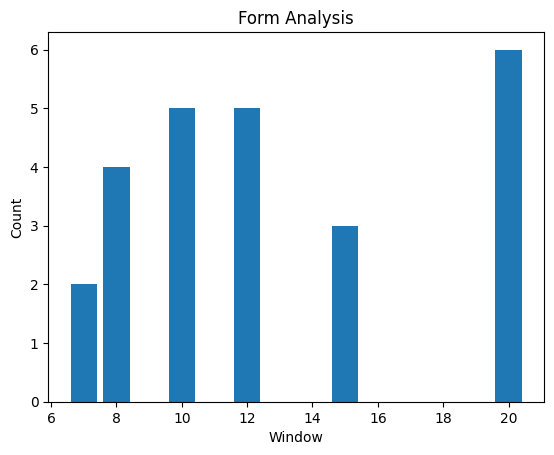

In [ ]:
import matplotlib.pyplot as plt
pList=[i[1] for i in list(filter(lambda i: i[0] >= 0.8,flist))] #change the threshold for correlation to get different graphs
D={k:pList.count(k) for k in set(pList)}
print(len(flist))
print(D)
labels = list(D.keys())
values = list(D.values())

# Create a bar chart using the data
plt.bar(labels, values)

# Add labels to the chart
plt.title("Form Analysis")
plt.xlabel("Window")
plt.ylabel("Count")

# Show the chart
plt.show()


Player specific debugging

In [22]:
path='/content/drive/MyDrive/Cricket Related Data/PLAYERS/V Kohli.csv'
df = pd.read_csv(path).drop(axis=1,columns=['Unnamed: 0'])
M=df.pop('match_id')#.to_numpy()
D=[]
for m in M:
  D.append(json.load(open(os.path.join(json_path,str(m)+'.json'),'r'))["info"]["dates"][0])
df_=pd.DataFrame({'match_id':M, 'date':D})
df=pd.concat([df_,df],axis=1)
df = df[['date', 'match_id', 'venue', 'opposition', 'runs_scored']]
df
Lx=[]
x=10
# for x in [3,4,5,7,8,10,12,15,20]:
df1 = df.groupby(['date', 'match_id', 'venue', 'opposition',]).sum()

L1 = df1['runs_scored'].to_numpy()

df1['cum_avg_runs']=[0]+[np.mean(L1[:i]) for i in range(1,len(L1))]
L2=df1['cum_avg_runs'].to_numpy()
# print(len(L1)==df1['runs_scored'].shape[0])
# print(len([0]+[np.mean(L1[:i]) for i in range(1,x)] + [np.mean(L1[i-x:i]) for i in range(x,len(L1))]))
df1['form_runs_sum'] = [0]+[np.mean(L1[:i]) for i in range(1,x)] + [np.mean(L1[i-x:i]) for i in range(x,len(L1))]
L3=df1['form_runs_sum'].to_numpy()
df1['form'] = [0.5]+[L3[I]/(L2[I]*2) for I in range(1,len(L1))]
# df1
Lx.append((df1.iloc[x+1:,[0,3]].corr().iloc[1,0],x))
print(df1.iloc[x+1:,[0,3]].corr().iloc[1,0])
print(df1.iloc[x+1:,[0,2]].corr().iloc[1,0])
# print(max(Lx))
# print()
# for i in Lx:
#   print(i)

0.08818701548792866
0.11936931040662574


In [ ]:
import os
import pandas as pd
import numpy as np
import json

In [ ]:
odi_dir='odis_json'

In [ ]:
the_10=['England','Australia','New Zealand','South Africa','West Indies','India','Pakistan','Afghanistan','Bangladesh','Sri Lanka']

In [ ]:
name1="1st_Innings.csv"
name2="2nd_Innings.csv"
dir_path_men="D:/Cricket Prediction Project/ODI/ODI_MEN"

In [ ]:
for filename in os.listdir(odi_dir):
    json_file=open(os.path.join(odi_dir,filename))
    file=json.load(json_file) 
    if file["info"]["gender"] == "male":
      continue
    meta_data = {
        "gender":file["info"]["gender"],
        "teams":file["info"]["teams"],
        "venue":file["info"]["venue"],
        "date":file["info"]["dates"][0],
    }
    data_frame_first_innings,data_frame_second_innings={
        "delivery":[],
        "batter":[],
        "non_striker":[],
        "bowler":[],
        "run_hit":[],
        "extras":[],
        "type_of_extras":[],
        "total":[],
        "wicket":[],
        "player_dismissed":[],
        "mode_of_dismissal":[]
    },{
        "delivery":[],
        "batter":[],
        "non_striker":[],
        "bowler":[],
        "run_hit":[],
        "extras":[],
        "type_of_extras":[],
        "total":[],
        "wicket":[],
        "player_dismissed":[],
        "mode_of_dismissal":[]
    }

    if(len(file["innings"])>=2):
        for i in file["innings"][0]["overs"]:
            c=1
            for j in i["deliveries"]:
                ball_no=str(i["over"])+"."+str(c)
                batter=j["batter"]
                bowler=j["bowler"]
                non_striker=j["non_striker"]
                run_hit=j["runs"]["batter"]
                extras=j["runs"]["extras"]
                type_of_extras="null"
                total=j["runs"]["total"]
                wickets=0
                player_dismissed="null"
                mode_of_dismissal="null"
                if "wickets" in j:
                    wickets=1
                    player_dismissed=j["wickets"][0]["player_out"]
                    mode_of_dismissal=j["wickets"][0]["kind"]
                if "extras" in j:
                    for k in j["extras"]:
                        type_of_extras=str(k)+" "
                data_frame_first_innings["delivery"].append(ball_no)
                data_frame_first_innings["batter"].append(batter)
                data_frame_first_innings["non_striker"].append(non_striker)
                data_frame_first_innings["bowler"].append(bowler)
                data_frame_first_innings["run_hit"].append(run_hit)
                data_frame_first_innings["extras"].append(extras)
                data_frame_first_innings["type_of_extras"].append(type_of_extras)
                data_frame_first_innings["total"].append(total)
                data_frame_first_innings["wicket"].append(wickets)
                data_frame_first_innings["player_dismissed"].append(player_dismissed)
                data_frame_first_innings["mode_of_dismissal"].append(mode_of_dismissal)
                c+=1
        
        for i in file["innings"][1]["overs"]:
            c=1
            for j in i["deliveries"]:
                ball_no=str(i["over"])+"."+str(c)
                batter=j["batter"]
                bowler=j["bowler"]
                non_striker=j["non_striker"]
                run_hit=j["runs"]["batter"]
                extras=j["runs"]["extras"]
                type_of_extras="null"
                total=j["runs"]["total"]
                wickets=0
                player_dismissed="null"
                mode_of_dismissal="null"
                if "wickets" in j:
                    wickets=1
                    player_dismissed=j["wickets"][0]["player_out"]
                    mode_of_dismissal=j["wickets"][0]["kind"]
                if "extras" in j:
                    for k in j["extras"]:
                        type_of_extras=str(k)+" "
                data_frame_second_innings["delivery"].append(ball_no)
                data_frame_second_innings["batter"].append(batter)
                data_frame_second_innings["non_striker"].append(non_striker)
                data_frame_second_innings["bowler"].append(bowler)
                data_frame_second_innings["run_hit"].append(run_hit)
                data_frame_second_innings["extras"].append(extras)
                data_frame_second_innings["type_of_extras"].append(type_of_extras)
                data_frame_second_innings["total"].append(total)
                data_frame_second_innings["wicket"].append(wickets)
                data_frame_second_innings["player_dismissed"].append(player_dismissed)
                data_frame_second_innings["mode_of_dismissal"].append(mode_of_dismissal)
                c+=1

    data1=pd.DataFrame(data_frame_first_innings)
    data2=pd.DataFrame(data_frame_second_innings)
    dir_name=str(meta_data["teams"][0]) + " vs " + str(meta_data["teams"][1]) + " " + str(filename).rstrip('.json')
    path=os.path.join(dir_path_men,dir_name)
    
    try:
        os.mkdir(path)
        data1.to_csv(os.path.join(path,name1))
        data2.to_csv(os.path.join(path,name2))
        data=json.dumps(meta_data)
        with open(os.path.join(path,"meta_data.json"), "w") as outfile:
            outfile.write(data)
    except:
        print(dir_name+" exists twice")